# Wine Quality
## Description

Data set of wines samples containing their attributes such as acidity, chlorides, density, etc. These wines were documented and then scored by professional wine testers.

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | fixed acidity | 0 - 10   |
| 2   | volatile acidity   | 0 - 1 |
| 3   | citric acid | 0 - 100 | 
| 4   |residual sugar | 0 - 0.1 |
| 5   | chlorides | 0 - 1 |
| 6   | free sulfur dioxide| 0 or 0.5 |
| 7   | total sulfur dioxide   |0 - 1 |
| 8   |  density| 0 - 1 |
| 9   |pH| 0 - 1 |
| 10  | sulphates | Location ID |
| 11  | alcohol | Location ID |
| 12  | quality | Location ID |


## Importing and processing dataset

In [1]:
import numpy as np
import pandas as pd

In [3]:
headers = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
data_red = pd.read_csv("../../datasets/regression/wine-data-red", header = None, names = headers, sep = ';')

## Preparing the Dataset

In [20]:
data_red  = data_red.iloc[1: , :]

for x in data_red:
    data_red[x] = pd.to_numeric(data_red[x])

The following block prints the shape and column datatypes of the processed dataset.

In [21]:
print(data_red.shape)
print(data_red.dtypes)

(1598, 12)
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


## Preprocessing the Dataset

In [25]:
from sklearn.model_selection import train_test_split

X = (data_red.iloc[:,:data_red.shape[1]-1]).to_numpy()
y = data_red.iloc[:,data_red.shape[1]-1:data_red.shape[1]].to_numpy().flatten()

# Split the data set into a 60:20:20 (train:test:val) ratio
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.80, test_size = 0.20, random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size=0.75, test_size = 0.25, random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Training on Multiple Regressors

In [28]:
#Manage imports 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from utilities import train_estimators, plot_estimator_scores

## Training on Multiple Regressors

### Linear Regression

In [30]:
LinearRegressionEstimators = LinearRegression().fit(X_train_scaled, y_train)
LR_train_score = LinearRegressionEstimators.score(X_train_scaled, y_train)
LR_test_score = LinearRegressionEstimators.score(X_test_scaled, y_test)
LR_val_score = LinearRegressionEstimators.score(X_val_scaled, y_val)
LR_scores = [LR_train_score,LR_test_score,LR_val_score]
print(LR_scores)

[0.37096272367442196, 0.358321969921948, 0.30961513502464943]


### SVM Regression

Training SVR(C=0.01, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000)...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=1000.0, gamma=0.0001, max_iter=10000)...


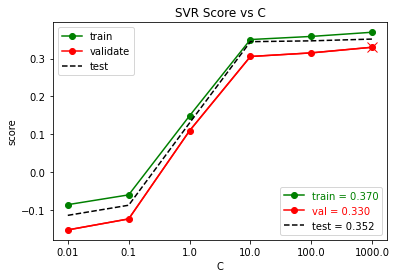

In [31]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1,1.0,10.0,100.0,1000.0]

SVMEstimators = train_estimators(X_train_scaled, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Decision Tree Regression

Training DecisionTreeRegressor(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=100, splitter='random', random_state=0)...


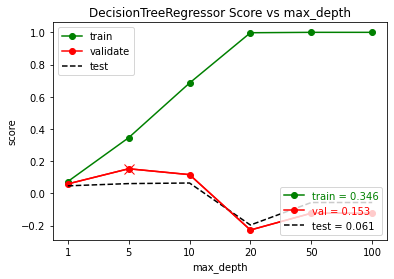

In [32]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train_scaled, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## RandomForest Regressor

Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20, random_state=0)...
Training RandomForestRegressor(max_depth=50, random_state=0)...
Training RandomForestRegressor(max_depth=100, random_state=0)...


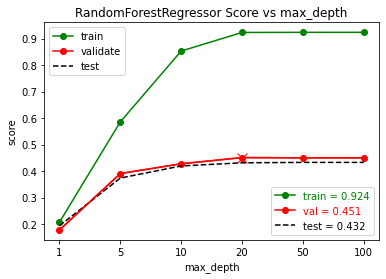

In [33]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train_scaled, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

## K-nearest Regressor

Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...


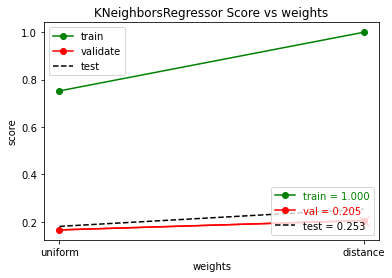

In [34]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

In [ ]:


adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)



## Ada Boost Regression

Training AdaBoostRegressor(n_estimators=10, random_state=0, )...
Training AdaBoostRegressor(n_estimators=50, random_state=0, )...
Training AdaBoostRegressor(n_estimators=100, random_state=0, )...
Training AdaBoostRegressor(n_estimators=500, random_state=0, )...
Training AdaBoostRegressor(n_estimators=1000, random_state=0, )...
Training AdaBoostRegressor(n_estimators=5000, random_state=0, )...


<ipython-input-10-b1055e0afb51>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, training_scores, '-ok', color = 'g', label = 'train')
<ipython-input-10-b1055e0afb51>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x2, val_scores, '-ok',color = 'r', label = 'val')


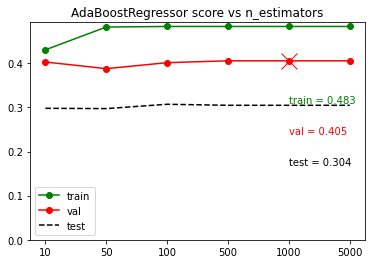

<Figure size 432x288 with 0 Axes>

In [18]:
AdaBoostEstimators = train_estimators(X_train, y_train, AdaBoostRegressor,
                                   'n_estimators', [10, 50, 100, 500, 1000, 5000], random_state=0)
plot_estimator_scores(AdaBoostEstimators,'n_estimators',[10, 50, 100, 500, 1000, 5000])

## Gaussian Process Regressor

In [19]:
clf = GaussianProcessRegressor()
NaiveBayesRegressor=clf.fit(X_train, y_train)
NB_test_scores =  NaiveBayesRegressor.score(X_test, y_test)
NB_val_scores =  NaiveBayesRegressor.score(X_val, y_val)
print(NB_val_scores,NB_test_scores)

-3.18513822507314 -4.421405111929649
